# Tensor Sensor

TensorSensor es una librería que clarifica las excepciones al entregar mensajes más detallados y sobre todo visualizar las dimensiones de los tensores. Es compatible con **NumPy**, Tensorflow, PyTorch, JAX, Keras y fastai. Pueden encontrar [aquí](https://explained.ai/tensor-sensor/index.html) la documentación oficial.

<img src="img/tensor_sensor.png" alt="drawing" style="width:60%;"/>

## Instalamos y cargamos la librería

In [14]:
%pip install tensor-sensor --quiet


Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [6]:
import tsensor
import sys
tsensor.__version__

'1.0'

## NumPy

In [7]:
import numpy as np

W = np.array([[1, 2], [3, 4]])
b = np.array([9, 10]).reshape(2, 1)
x = np.array([4, 5]).reshape(2, 1)
h = np.array([1,2])

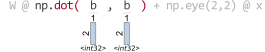

shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)
Cause: np.dot(b,b) tensor arg b w/shape (2, 1), arg b w/shape (2, 1)


In [8]:
try: 
    with tsensor.clarify():
        W @ np.dot(b,b) + np.eye(2,2) @ x
except BaseException as e:
    print(e)

In [9]:
n = 200                          
d = 764                          
n_neurons = 100                  

W = np.random.rand(d,n_neurons)  
b = np.random.rand(n_neurons,1)
X = np.random.rand(n,d)          

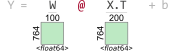

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 764 is different from 100)
Cause: @ on tensor operand W w/shape (764, 100) and operand X.T w/shape (764, 200)

In [10]:
import tsensor
with tsensor.clarify():
    Y = W @ X.T + b

## Visualizando Operaciones Matriciales


In [11]:
W = np.random.rand(2000,2000)
b = np.random.rand(2000,1)
h = np.random.rand(1_000_000)
x = np.random.rand(2000,1)

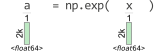

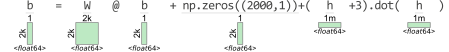

In [12]:
with tsensor.explain() as explained:
    a = np.exp(x)
    b = W @ b + np.zeros((2000,1))+(h+3).dot(h)

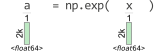

In [13]:
explained.views[0]

## Bibliografía

* [Tensor Sensor Docs](https://explained.ai/tensor-sensor/index.html)